In [4]:
%pip install langchain-core langchain langgraph google-generativeai pydantic python-dotenv

print("\n" + "="*60)
print("Verifying installation...")
print("="*60)

import subprocess
import sys

packages_to_check = [
    "langchain-core", 
    "langchain",
    "langgraph",
    "google-generativeai"
]

for package in packages_to_check:
    result = subprocess.run([sys.executable, "-m", "pip", "show", package], 
                          capture_output=True, text=True)
    if result.returncode == 0:
        version_line = [line for line in result.stdout.split('\n') if line.startswith('Version:')]
        if version_line:
            print(f"✅ {package}: {version_line[0].split(':')[1].strip()}")
        else:
            print(f"✅ {package}: Installed")
    else:
        print(f"❌ {package}: NOT FOUND")

print("="*60)
print("\n✅ Installation complete!")
print("⚠️ Please restart the kernel: Kernel -> Restart Kernel")


Note: you may need to restart the kernel to use updated packages.

Verifying installation...
✅ langchain-core: 1.0.4
✅ langchain: 1.0.5
✅ langgraph: 1.0.3
✅ google-generativeai: 0.8.5

✅ Installation complete!
⚠️ Please restart the kernel: Kernel -> Restart Kernel


In [5]:
import sys
import os
import importlib

sys.path.insert(0, os.getcwd())

print("Reloading graph module to ensure latest changes...")
if 'graph.course_builder_graph' in sys.modules:
    importlib.reload(sys.modules['graph.course_builder_graph'])

try:
    print("\nImporting graph module...")
    from graph.course_builder_graph import create_course_builder_graph
    from IPython.display import Markdown
    
    print("✅ Graph module imported successfully!")
    print("\nCreating course builder graph with updated routing functions...")
    app = create_course_builder_graph()
    print("✅ Graph created successfully!")
    
    print("\nGenerating Mermaid diagram...")
    graph_obj = app.get_graph()
    mermaid_diagram = graph_obj.draw_mermaid()
    print("✅ Mermaid diagram generated!")
    
    print("\n" + "="*50)
    print("Mermaid Diagram Code:")
    print("="*50)
    print(mermaid_diagram)
    print("="*50 + "\n")
    
    print("Checking for edge labels in diagram...")
    expected_labels = ["pass", "review", "approve", "reject", "continue"]
    found_labels = [label for label in expected_labels if label in mermaid_diagram]
    
    if found_labels:
        print(f"✅ Found edge labels: {', '.join(found_labels)}")
        print("✅ Labels are correctly displayed in the diagram!")
    else:
        print("⚠️ Edge labels NOT found in diagram!")
        print("\nThis means the graph was created before code changes.")
        print("📋 SOLUTION:")
        print("   1. Go to: Kernel -> Restart Kernel")
        print("   2. Run Cell 0 (install packages)")
        print("   3. Run this cell again")
        print("\nThe code is correct - labels will appear after restart!")
    
    display(Markdown(f'```mermaid\n{mermaid_diagram}\n```'))
    
except ImportError as e:
    print(f"❌ Import Error: {e}")
    print("\n⚠️ This usually means:")
    print("   1. Packages are not installed correctly")
    print("   2. Kernel needs to be restarted after installation")
    print("   3. Python path issue - make sure you're in the project directory")
    print("\n📋 Steps to fix:")
    print("   1. Run the first cell to install packages")
    print("   2. Go to: Kernel -> Restart Kernel (CRITICAL!)")
    print("   3. Run this cell again")
    import traceback
    traceback.print_exc()
except Exception as e:
    print(f"❌ Error: {e}")
    print(f"\nError type: {type(e).__name__}")
    import traceback
    print("\nFull traceback:")
    traceback.print_exc()


Reloading graph module to ensure latest changes...

Importing graph module...
✅ Graph module imported successfully!

Creating course builder graph with updated routing functions...
✅ Graph created successfully!

Generating Mermaid diagram...
✅ Mermaid diagram generated!

Mermaid Diagram Code:
---
config:
  flowchart:
    curve: linear
---
graph TD;
	__start__([<p>__start__</p>]):::first
	collect_user_input(collect_user_input)
	researcher_agent(researcher_agent)
	module_structure_agent(module_structure_agent)
	validate_module_structure(validate_module_structure)
	human_review_structure(human_review_structure<hr/><small><em>__interrupt = after</em></small>)
	xdp_agent(xdp_agent)
	course_content_agent(course_content_agent)
	validate_content(validate_content)
	human_review_content(human_review_content<hr/><small><em>__interrupt = after</em></small>)
	quiz_curator_agent(quiz_curator_agent)
	validate_quizzes(validate_quizzes)
	human_review_quizzes(human_review_quizzes<hr/><small><em>__interr

```mermaid
---
config:
  flowchart:
    curve: linear
---
graph TD;
	__start__([<p>__start__</p>]):::first
	collect_user_input(collect_user_input)
	researcher_agent(researcher_agent)
	module_structure_agent(module_structure_agent)
	validate_module_structure(validate_module_structure)
	human_review_structure(human_review_structure<hr/><small><em>__interrupt = after</em></small>)
	xdp_agent(xdp_agent)
	course_content_agent(course_content_agent)
	validate_content(validate_content)
	human_review_content(human_review_content<hr/><small><em>__interrupt = after</em></small>)
	quiz_curator_agent(quiz_curator_agent)
	validate_quizzes(validate_quizzes)
	human_review_quizzes(human_review_quizzes<hr/><small><em>__interrupt = after</em></small>)
	finalize_course(finalize_course)
	__end__([<p>__end__</p>]):::last
	__start__ --> collect_user_input;
	collect_user_input --> researcher_agent;
	course_content_agent --> validate_content;
	human_review_content -. &nbsp;reject&nbsp; .-> course_content_agent;
	human_review_content -. &nbsp;approve&nbsp; .-> quiz_curator_agent;
	human_review_quizzes -. &nbsp;approve&nbsp; .-> finalize_course;
	human_review_quizzes -. &nbsp;reject&nbsp; .-> quiz_curator_agent;
	human_review_structure -. &nbsp;reject&nbsp; .-> module_structure_agent;
	human_review_structure -. &nbsp;approve&nbsp; .-> xdp_agent;
	module_structure_agent --> validate_module_structure;
	quiz_curator_agent --> validate_quizzes;
	researcher_agent --> module_structure_agent;
	validate_content -. &nbsp;review&nbsp; .-> human_review_content;
	validate_content -. &nbsp;pass&nbsp; .-> quiz_curator_agent;
	validate_module_structure -. &nbsp;review&nbsp; .-> human_review_structure;
	validate_module_structure -. &nbsp;pass&nbsp; .-> xdp_agent;
	validate_quizzes -. &nbsp;pass&nbsp; .-> finalize_course;
	validate_quizzes -. &nbsp;review&nbsp; .-> human_review_quizzes;
	xdp_agent --> course_content_agent;
	finalize_course --> __end__;
	classDef default fill:#f2f0ff,line-height:1.2
	classDef first fill-opacity:0
	classDef last fill:#bfb6fc

```

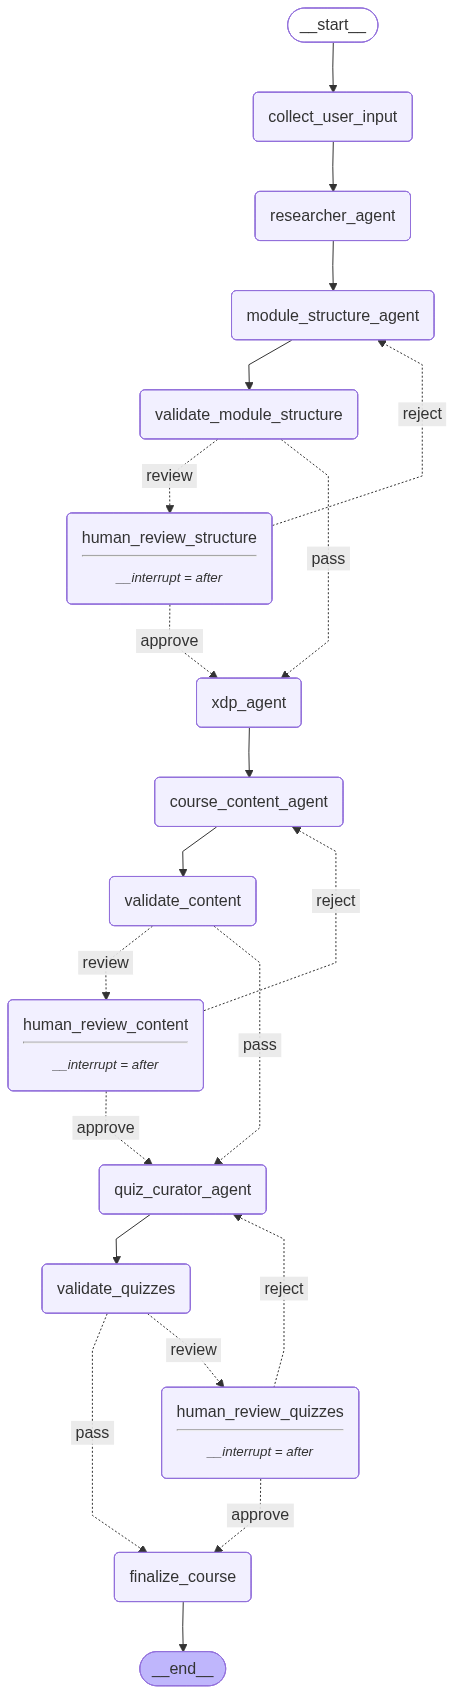

In [6]:
try:
    from IPython.display import Image, display
    png_image = app.get_graph().draw_mermaid_png()
    display(Image(png_image))
except Exception as e:
    print(f"PNG visualization: {e}")
    print("Note: Install graphviz for PNG visualization")
